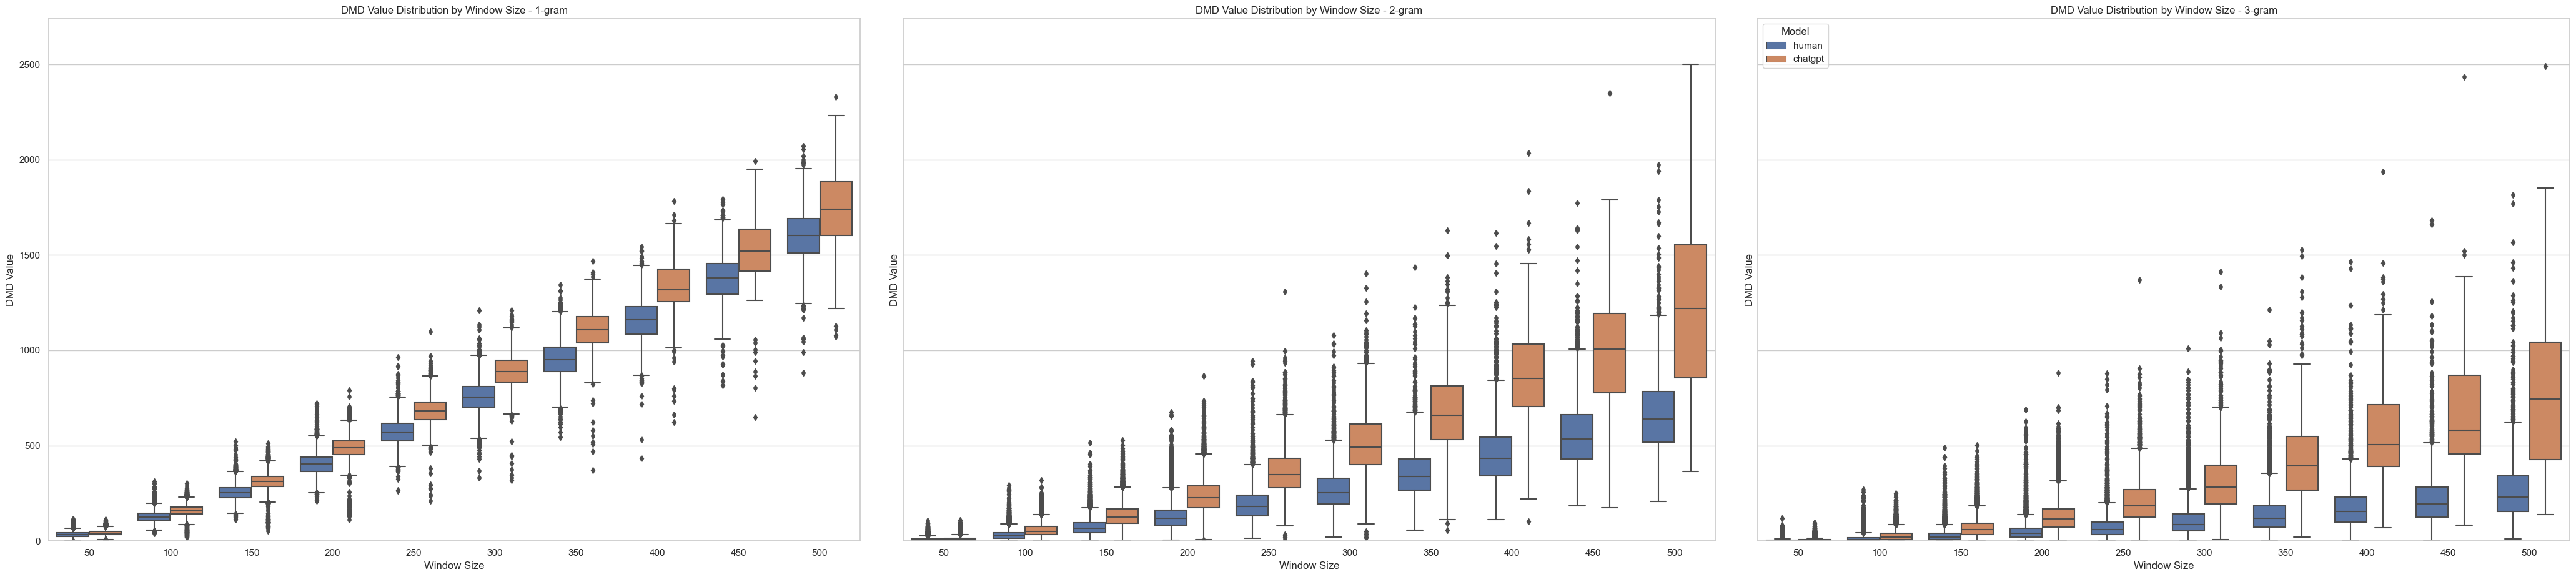

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import ast

sns.set(style="whitegrid")

def plot_dmd_distribution_by_gram(global_result_df):
    # 设置全局字体大小
    plt.rcParams.update({'font.size': 32})
    # 将 dmd_sequence 列转换为实际的数值列表
    global_result_df['dmd_sequence'] = global_result_df['dmd_sequence'].apply(ast.literal_eval)

    # 获取不同的gram值
    grams = global_result_df['gram'].unique()
    num_grams = len(grams)

    # 创建多个子图
    fig, axs = plt.subplots(1, num_grams, figsize=(14 * num_grams, 10), sharey=True)

    # 如果只有一个子图，将 axs 转换为列表
    if num_grams == 1:
        axs = [axs]

    for i, gram in enumerate(sorted(grams)):
        # 过滤特定gram的数据
        gram_data = global_result_df[global_result_df['gram'] == gram]

        # 准备绘制箱线图的数据
        plot_data = []

        for _, row in gram_data.iterrows():
            window_size = row['window_size']
            dmd_sequence = row['dmd_sequence']
            model = row['model']

            for value in dmd_sequence:
                plot_data.append({'window_size': window_size, 'dmd_value': value, 'model': model})

        plot_df = pd.DataFrame(plot_data)

        # 计算统一y轴的最大值和最小值，并添加适当的边距
        max_value = plot_df['dmd_value'].max() * 1.1
        min_value = plot_df['dmd_value'].min()

        # 绘制箱线图
        sns.boxplot(ax=axs[i], x='window_size', y='dmd_value', hue='model', data=plot_df)

        # 设置y轴范围
        axs[i].set(ylim=(min_value, max_value))

        axs[i].set_xlabel('Window Size')
        axs[i].set_ylabel('DMD Value')
        axs[i].set_title(f'DMD Value Distribution by Window Size - {gram}-gram')

        if i == 2:
            axs[i].legend(title='Model')  # 仅在第一个子图上显示图例
        else:
            axs[i].legend().set_visible(False)  # 隐藏后续子图的图例

    plt.tight_layout()
    plt.show()

# 从文件夹中读取 CSV 文件并合并
def load_and_combine_data(file_path_pattern):
    # 获取文件夹中所有匹配的 CSV 文件
    all_files = glob.glob(file_path_pattern)
    
    # 初始化空的 DataFrame 列表
    df_list = []

    # 遍历找到的 CSV 文件，并将其读取为 DataFrame
    for filename in all_files:
        df = pd.read_csv(filename)
        df_list.append(df)

    # 合并所有 DataFrame
    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df

# # Example usage
# file_path_pattern = './csv_folder/*.csv'  # 替换为你的文件夹路径和通配符模式
# global_result_df = load_and_combine_data(file_path_pattern)

global_result_df = pd.read_csv("./HC3_reddit_all.csv")
plot_dmd_distribution_by_gram(global_result_df)


In [19]:
import pandas as pd
import numpy as np
from collections import Counter

def calculate_entropy(dmd_sequence):
    # 计算每个值的出现频率
    value_counts = Counter(dmd_sequence)
    total_count = sum(value_counts.values())

    # 计算每个值的概率
    probabilities = np.array([count / total_count for count in value_counts.values()])

    # 计算熵
    entropy = -np.sum(probabilities * np.log2(probabilities))

    return entropy

# Example usage
# 假设 dmd_sequence 本身就是数值列表
entropies = global_result_df['dmd_sequence'].apply(calculate_entropy)

# 将熵添加到数据框
global_result_df['entropy'] = entropies

# 打印结果
print(global_result_df[['gram', 'window_size', 'model', 'entropy']])

    gram  window_size    model    entropy
0      1           50    human  14.006716
1      1           50  chatgpt  14.017398
2      1          100    human  13.770114
3      1          100  chatgpt  13.993713
4      1          150    human  13.419237
5      1          150  chatgpt  13.775135
6      1          200    human  13.055095
7      1          200  chatgpt  13.322079
8      1          250    human  12.704305
9      1          250  chatgpt  12.373166
10     1          300    human  12.369937
11     1          300  chatgpt  10.923105
12     1          350    human  12.044270
13     1          350  chatgpt   9.384735
14     1          400    human  11.706465
15     1          400  chatgpt   7.768184
16     1          450    human  11.428802
17     1          450  chatgpt   6.303781
18     1          500    human  11.127799
19     1          500  chatgpt   4.735926
20     2           50    human   7.524342
21     2           50  chatgpt   8.964683
22     2          100    human  13

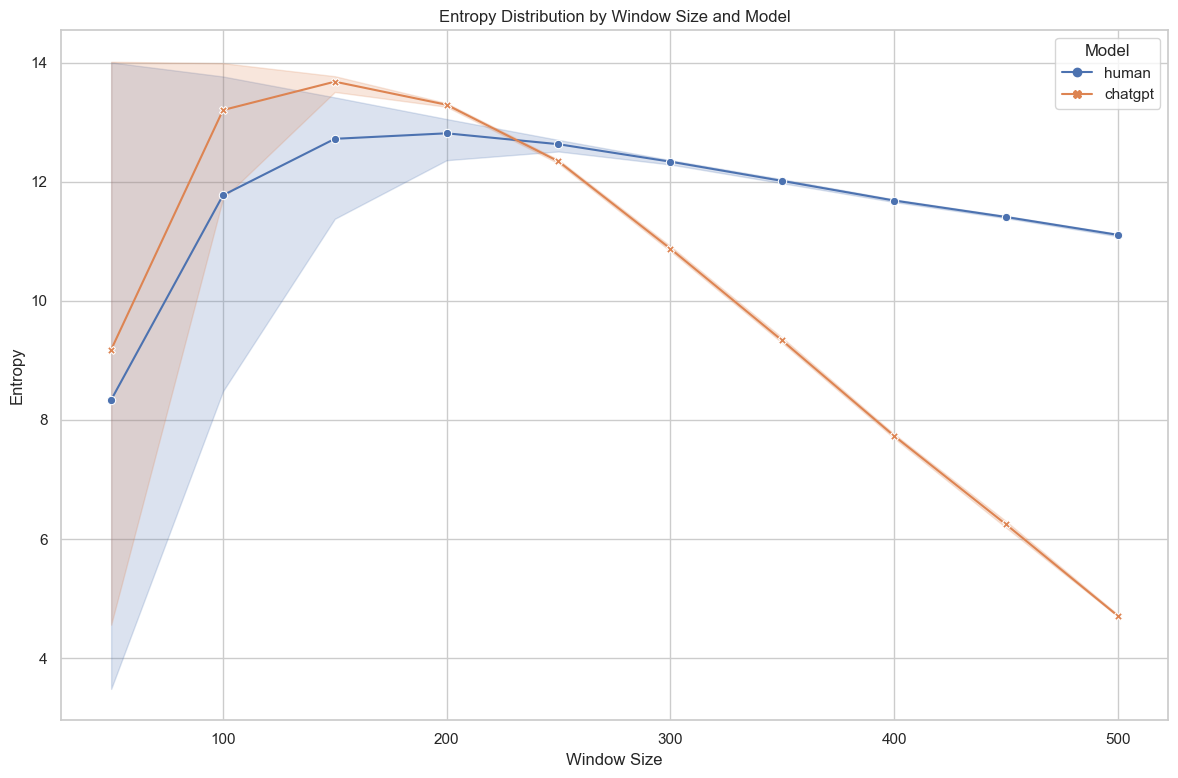

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 设置全局字体大小
plt.rcParams.update({'font.size': 14})

# 设置绘图尺寸
plt.figure(figsize=(12, 8))

# 使用Seaborn的lineplot绘制不同模型在不同window size下的熵值分布
sns.lineplot(data=global_result_df, x='window_size', y='entropy', hue='model', style='model', markers=True, dashes=False)

# 设置图表标题和标签
plt.title('Entropy Distribution by Window Size and Model')
plt.xlabel('Window Size')
plt.ylabel('Entropy')

# 显示图例
plt.legend(title='Model')

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()
